

# Investigate a dataset: The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 10k movies from The Movie Database(TMDB) and is focussed on the popularity and profitability of movies and their relation to several movie charachteristics. A number if charachteristics about the movies are included in each rows include: <br/>
 * 'popularity' indicates values representing likability of the movies.
 * 'original_title' - indicates movie titles
 * 'cast' tells us names of the movie's cast
 * 'director' tells us names of movie directors
 * 'runtime' indicates the length of the movies
 * 'genres' indicates different genres the movies fall into
 * 'production_companies' tells us the names of companies that produced the movies.
 * 'budget_adj' indicates the inflation adjusted amount of the movie budget
 * 'revenue_adj' indicates the inflation adjusted amount of the movie revenues
### Dataset Description 

> We have a CSV file tmdb.csv that contains the data we are going to analyze.

            
### Question(s) for Analysis

1. Which movies make the highest profits and why?
2. Does a movie's budget affect it's popularity?
3. What is the most popular genre and how does it affect budgeting and revenues?
4. How does the movie runtime affect it's populatity and eventually revenues?
        

In [5]:
# Importing all usable packages in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section, we will load the data, check for cleanliness and then trim and clean the data for analysis.


### General Properties
 

In [6]:
# Load data.
df = pd.read_csv('tmdb-movies.csv')
#print out a few lines, transposed for better column visualization.
df.head().T

,0,1,2,3,4
id,135397,76341,262500,140607,168259
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852
popularity,32.9858,28.4199,13.1125,11.1731,9.33501
budget,150000000,150000000,110000000,200000000,190000000
revenue,1513528810,378436354,295238201,2068178225,1506249360
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home


In [7]:
# Checking the dimensions of the data
df.shape

(10866, 21)

The data consists of 10866 movies with 11 columns containing movie ids and other properties.

In [8]:
# Inspecting the duplicates in the data
df[df.duplicated(keep=False)].sort_values(by = 'id')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


The movie **TEKKEN** has been repeated by all properties in the database. This needs to be dropped in the data cleaning process.

In [9]:
#Check for the number of unique movies, by id
df['id'].nunique()

10865

There are 10865 unique movies by id

In [10]:
df.duplicated(subset = ['id','imdb_id']).sum()

1

There is 1 duplicate moview based on id and imdb_id

In [11]:
#Check for datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

All columns for numerical analysis contain intergers or float values

In [12]:
#Inspect data for missing values
df.isna().any()[lambda x: x]

imdb_id                 True
cast                    True
homepage                True
director                True
tagline                 True
keywords                True
overview                True
genres                  True
production_companies    True
dtype: bool

The columns imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies 
all contain missing values. None of the missing values are numerical hence they will not require filling in. Some of the miss

In [13]:
#Find the missing values in each column and count them
null_count = df.isna().sum()
#convert the Series output to a dataframe for analysis
null_count.to_frame()
#Label the null values column as NAN
null_count = pd.DataFrame(null_count,columns = ['NAN'])
#sort the missing values by NAN count
null_count_sorted = null_count.sort_values(by='NAN',ascending = False)
#Filter out the missing values.
null_count_sorted.loc[null_count_sorted['NAN']>0]
#null_count_sorted #= null_count_sorted[(null_count.NANs[] > 0)]

,NAN
homepage,7930
tagline,2824
keywords,1493
production_companies,1030
cast,76
director,44
genres,23
imdb_id,10
overview,4


The missing values are mostly on homepage, tagline, keywords, production companies, with each missing values accounting for above 10% of the data. This will affect the usability and hence we will drop the columns in the data analysis step of the process.

In [14]:
#Geting summary statistics about the data.
df_summary = df.describe()
df_summary

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


using inflation adjusted values, the mean budget is 17549894.03, the maximum is 425000000 and the minimum is 0. There is are values of zero budget zero revenues which need to be left out when analysing the budget and revenues.
For most movies, the runtime is between 90 and 100, with a mean of 102.


In [26]:
#View data parts where budget is 0

budget_adj1 = df.loc[:,'budget_adj']
budget_adj1.value_counts().head(5)

0.000000e+00    5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
Name: budget_adj, dtype: int64

The budgeting data has 5696 values which are all zeros

In [27]:
budget_adj1.nunique()

2614

Budgeting column has only 2614 unique values.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [28]:
#drop duplicates in the data to get accurate statistics
df.drop_duplicates(inplace=True)
#check if there are any duplicates remaining.
df.duplicated().sum()

0

There are no duplicates in the data

In [29]:
#Drop columns we wont use.
df.drop(['id','homepage','tagline','keywords','overview','release_date','release_year'],axis=1,inplace=True)
#a further drop is made of the budget and revenue columns in prefrence of
#the inflation adjusted figures for a more reflective comparison
df.drop(['imdb_id','budget','revenue'],axis=1,inplace=True)
#To view the resulting table
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,1.747999e+08,1.385749e+09


# Data Wrangling Summary

> After gathering the data from the csv file, we explored the first few rows of the dataset to get its general properties. We viewed the dimensions of the data. We checked for duplicates by rows to detect repetitions. We also checked for duplicate movies by imdb_id and id. We checked for data types and missing values to see if numerical columns would require filling. For non-numerical culumns we created an information dataframe to show the number of missing values in each column to check for the availability of data in the columns. Finally we investigated the summary statistics. A significant point noted was the number of budget values which were equal to 0

<a id='eda'></a>
## Exploratory Data Analysis
Now that we have trimmed and cleaned the data, we can now move to exploration. **Computing statistics** and **Creating visualizations** with the goal of addressing research questions in the introduction section.

    

# General Look

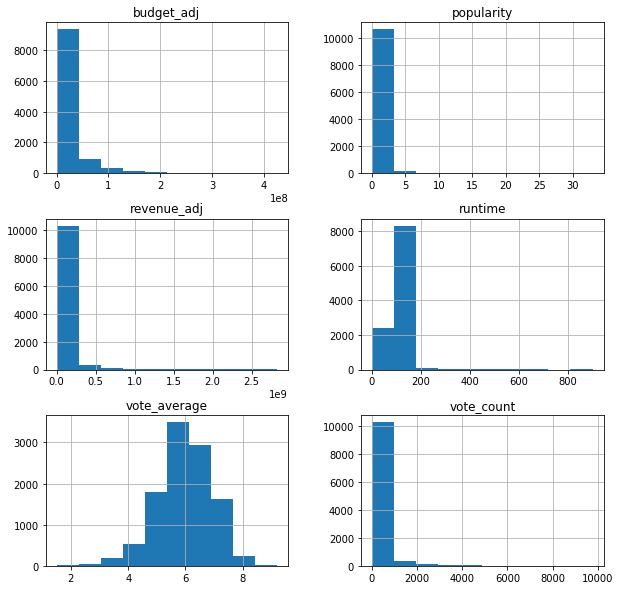

In [30]:
df.hist(figsize = (10,10));

* For most movies, the runtime is between 90 and 100.
* Most movie budgets start from 0 and have an average of 17549894

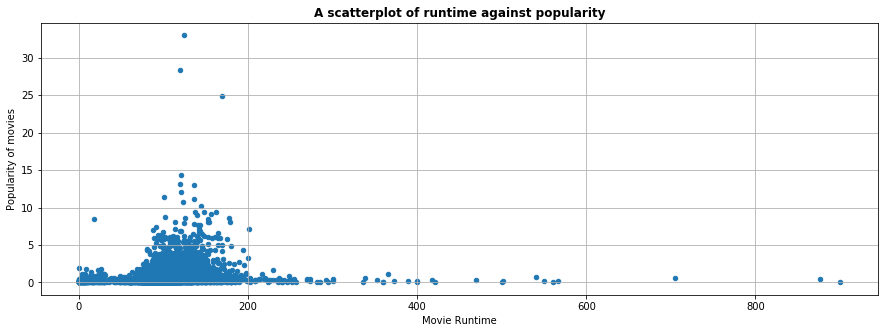

In [31]:
#Sorting data by revenue
budget_ascending = df.sort_values(by = ['budget_adj'])
#Reset index
budget_ascending_revenue = budget_ascending.reset_index(drop=True)
#check data
budget_ascending_revenue
#Plot scatterplots
budget_ascending_revenue.plot.scatter(x = 'runtime', y = 'popularity',figsize=(15,5));
plt.title('A scatterplot of runtime against popularity',fontweight="bold")
plt.xlabel("Movie Runtime");
plt.ylabel("Popularity of movies");
plt.grid(True)

* Movies with average runtime of between 90 to 100 are more popular. As length of movie goes beyond 200, populatiry drastically   drops.

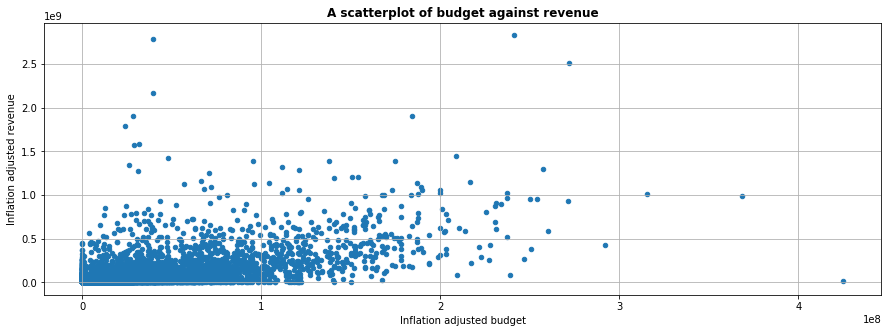

In [32]:
#Plot scatterplots
budget_ascending_revenue.plot.scatter(x = 'budget_adj', y = 'revenue_adj' ,figsize=(15,5));
plt.title('A scatterplot of budget against revenue',fontweight="bold")
plt.xlabel("Inflation adjusted budget");
plt.ylabel("Inflation adjusted revenue");
plt.grid(True)

* There is a strong positive relationship between budgeted amount and the revenues generated, as per the scatter plots.

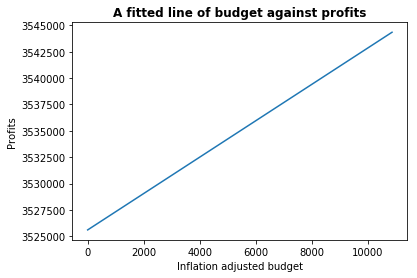

In [33]:
#plotting fitted line
#obtain slope and intercept
profits = budget_ascending_revenue['revenue_adj'] - budget_ascending_revenue['budget_adj']
m, b = np.polyfit(budget_ascending_revenue['budget_adj'],profits, 1)
leng = len(budget_ascending_revenue['budget_adj'])
x = np.array(range(leng))
plt.plot(x, m*x+b);
plt.title('A fitted line of budget against profits',fontweight="bold")
plt.xlabel("Inflation adjusted budget");
plt.ylabel("Profits");

* There is a strong positive relationship between budgeted amount and the profits generated.

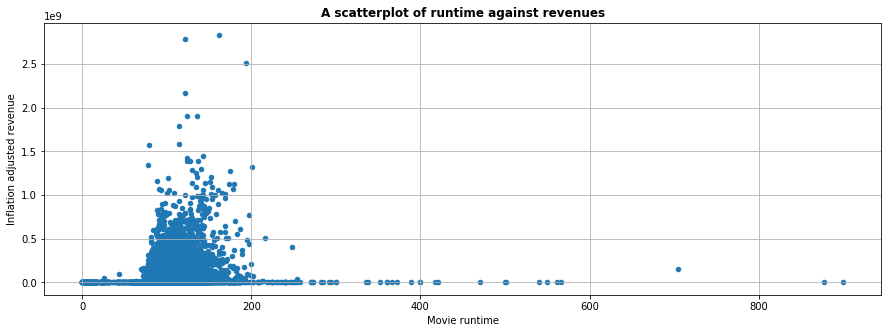

In [34]:
#Plot scatterplots
budget_ascending_revenue.plot.scatter(x = 'runtime', y = 'revenue_adj' ,figsize=(15,5));
plt.title('A scatterplot of runtime against revenues',fontweight="bold")
plt.xlabel("Movie runtime");
plt.ylabel("Inflation adjusted revenue");
plt.grid(True)

* More revenues are generated by movies of runtime 90 to 100.

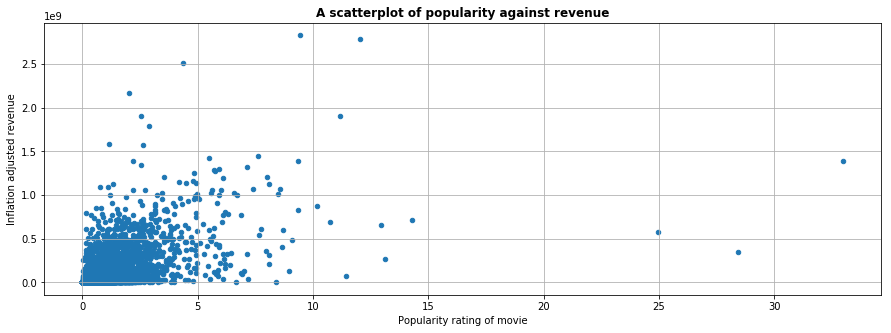

In [35]:
#Plot scatterplots
budget_ascending_revenue.plot.scatter(x = 'popularity', y = 'revenue_adj' ,figsize=(15,5));
plt.title('A scatterplot of popularity against revenue',fontweight="bold")
plt.xlabel("Popularity rating of movie");
plt.ylabel("Inflation adjusted revenue");
plt.grid(True)


* Popular movies generate more revenue.

In [36]:
#Function for finding most populat items in '|' sepatated data
def most_popular(data,column,symbol):
    #assign dataframe
    data = data
    #assign row
    column = data[column]
    #symbol assign
    symbol = symbol
    #join by separator
    concatenated = column.str.cat(sep=symbol)
    #Split to individuals
    split_values = pd.Series(concatenated.split(symbol))
    #Popularity rank
    popularity_rank = split_values.value_counts(ascending = False)
    return popularity_rank

In [37]:
#Finding most popular directors
director_popularity = df['director'].value_counts(ascending = False)
director_popularity.head(10).to_frame()

,director
Woody Allen,45
Clint Eastwood,34
Martin Scorsese,29
Steven Spielberg,29
Ridley Scott,23
Ron Howard,22
Steven Soderbergh,22
Joel Schumacher,21
Brian De Palma,20
Barry Levinson,19


The most popular director is Wood Allen

In [38]:
#Finding most popular genre
most_popular_genre = most_popular(data=df,column='genres',symbol='|')
most_popular_genre = most_popular_genre.head(10).to_frame()
most_popular_genre

,0
Drama,4760
Comedy,3793
Thriller,2907
Action,2384
Romance,1712
Horror,1637
Adventure,1471
Crime,1354
Family,1231
Science Fiction,1229


The most popular genre is Drama

In [39]:
# find the most popular production company
most_popular_production_companies = most_popular(data=df,column='production_companies',symbol='|')
most_popular_production_companies.head(10).to_frame()

,0
Universal Pictures,522
Warner Bros.,509
Paramount Pictures,431
Twentieth Century Fox Film Corporation,282
Columbia Pictures,272
New Line Cinema,219
Metro-Goldwyn-Mayer (MGM),218
Walt Disney Pictures,214
Touchstone Pictures,178
Columbia Pictures Corporation,160


The most populat production company is Universal Pictures

In [40]:
#Finding the most popular cast
most_popular_cast = most_popular(data=df,column='cast',symbol='|')
most_popular_cast.head(10).to_frame()

,0
Robert De Niro,72
Samuel L. Jackson,71
Bruce Willis,62
Nicolas Cage,61
Michael Caine,53
Robin Williams,51
John Cusack,50
John Goodman,49
Morgan Freeman,49
Liam Neeson,48


The most popular cast is Robert De Niro

<a id='conclusions'></a>
## Conclusions

* Movies that make the most revenues are of lengths between 90 and 100. This is because the population prefers average lengths  of movies, as shown by their popularity index. The legth affects popularity which in turn affect the revenues.
* Movie budgets have shown a weak positive correlation with revenues hence movie budgets may have little significance to a movie's revenue.
* The most popular genres are dramas followed by comedy and thrillers.
* The most popular production companies are universal pictures and warner bros.

## Limitations
> Budget and revenues data contained a significant number of missing values hindering visualizations available for it.

### Area of more research

> More study needs to be done to find out how the director, cast, and production company affect a movie's popularity and revenues.


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0